### Table of contents

<a href="#Step-1.-Download-the-data-and-prepare-it-for-analysis">Step 1. Download the data and prepare it for analysis<a/>  
    
<a href="#Step-2.-Make-reports-and-calculate-metrics">Step 2. Make reports and calculate metrics<a/>
* <a href="#Product">Product<a/> 
    * <a href="#How-many-people-use-it-every-day,-week-and-month?">How many people use it every day, week and month?</a>
    * <a href="#How-many-sessions-are-there-per-day?">How many sessions are there per day?<a/>
    * <a href="#What-is-the-length-of-each-session?">What is the length of each session?<a/>
    * <a href="#How-often-do-users-come-back?">How often do users come back?<a/>
* <a href="#Sales">Sales<a/>
    * <a href="#When-do-people-start-buying?">When do people start buying?<a/>
    * <a href="#How-many-orders-do-they-make-during-a-given-period-of-time?">How many orders do they make during a given period of time?<a/>
    * <a href="#What-is-the-average-purchase-size?">What is the average purchase size?<a/>
    * <a href="#How-much-money-do-they-bring?-(LTV)">How much money do they bring? (LTV)<a/>
* <a href="#Marketing">Marketing<a/>
    * <a href="#How-much-money-was-spent?">How much money was spent?<a/>
    * <a href="#How-much-did-customer-acquisition-from-each-of-the-sources-cost?">How much did customer acquisition from each of the sources cost?<a/>
    * <a href="#How-worthwhile-where-the-investments?-(ROI)">How worthwhile where the investments? (ROI)<a/>

    
<a href="#Write-a-general-conclusion">Write a general conclusion<a/>

### Step 1. Download the data and prepare it for analysis

In [91]:
# load libraries
from IPython.display import display
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [92]:
# load the csv data files to python and convert columns to contain the correct datatype
visits = pd.read_csv(
    'visits_log_us.csv', 
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)

# display the size of the dataset
display(visits.info())

# change the column names to lowercase and replace space with '_'
visits.columns = visits.columns.str.replace(' ', '_').str.lower()

# check for duplicates
display(visits.duplicated().sum())

# check for missing values
display(visits.isnull().sum())

# display first ten rows
display(visits.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

0

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


**Conclusion**


The dataset consists of 359400 rows and 5 columns. Column [`Device`] is with categorical variables, and the other columns are with quantitative variables. We decided to change the data in column [`Device`] from `object` type to `category` type so that we can avoid using a lot of memory, and also changed the data in column [`End Ts`] and column [`Start Ts`] from `object` type to `datetime` type so that we will able to carry out calculations.  
We decided to change the column names to lowercase and replace space with `_`. We also discovered that there are no duplicates or missing values in the dataset.


[<a href="#Table-of-contents">Back to top</a>]

In [93]:
# load the csv data files to python and 
orders = pd.read_csv(
    'orders_log_us.csv', 
    parse_dates=['Buy Ts']
)

# display the size of the dataset
display(orders.info())

# change the column names to lowercase and replace space with '_'
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

# check for duplicates
display(orders.duplicated().sum())

# check for missing values
display(orders.isnull().sum())

# display first ten rows
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

0

buy_ts     0
revenue    0
uid        0
dtype: int64

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


**Conclusion**

The dataset consists of 50415 rows and 3 columns. We decided to change the data in column [`Buy Ts`] from `object` type to `datetime` type so that we can avoid using a lot of memory and also be able to carry out calculations.  
We decided to change the column names to lowercase and replace space with `_`. We also discovered that there are no duplicates or missing values in the dataset.


[<a href="#Table-of-contents">Back to top</a>]

In [94]:
# load the csv data files to python and  and 
costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])

# display the size of the dataset
display(costs.info())

# check for duplicates
display(costs.duplicated().sum())

# check for missing values
display(costs.isnull().sum())

# display first ten rows
display(costs.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

0

source_id    0
dt           0
costs        0
dtype: int64

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


**Conclusion**

The dataset consists of 2542 rows and 3 columns. We decided to change the data in column [`dt`] from `object` type to `datetime` type so that we can avoid using a lot of memory and also be able to carry out calculations.  
We discovered that there are no duplicates or missing values in the dataset.

[<a href="#Table-of-contents">Back to top</a>]

In [95]:
# investigate column end_ts and start_ts
display(visits['end_ts'].describe())
display(visits['start_ts'].describe())

display(visits[visits['end_ts'] == '2018-06-01'])

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

,device,end_ts,source_id,start_ts,uid
355366,desktop,2018-06-01,4,2018-05-31 23:54:00,17972575701705277137


In [96]:
# group dataframe by device
device = visits.groupby('device').agg({'uid': 'nunique'}).reset_index()
display(device)

,device,uid
0,desktop,164523
1,touch,71345


**Conclusion**

We further carried out our investigation on the data by checking whether the sessions do not go beyond its boundary of May 2018 (2018-05-31). We noticed that there was a breach in our time interval condition in column `end_ts`. But after taking a deep look at the row where this breach occured, we noticed that the actual start of the session was on 2018-05-31.

We also discovered that we have two types of devices to access our platform (`desktop` and `touch`). 164523 users do make use of desktop to access or visit our platform, and 71345 users do make use of touch to visit our platform.

[<a href="#Table-of-contents">Back to top</a>]

In [97]:
# investigate column buy_ts
display(orders['buy_ts'].describe())

display(orders[orders['buy_ts'] == '2018-06-01 00:02:00'])

# drop row that exceed boundary
orders = orders[orders['buy_ts'] < '2018-06-01 00:02:00']
display(orders[orders['buy_ts'] == '2018-06-01 00:02:00'])

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


,buy_ts,revenue,uid


**Conclusion**

We noticed a date in column `buy_ts` that go beyond our boundary. We decided to delete this partcular row since this might affect analysis and recommendation.

[<a href="#Table-of-contents">Back to top</a>]

In [98]:
# investigate column dt
display(costs['dt'].describe())

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

**Conclusion**

The dataframe `costs` complied with our time interval condition.

[<a href="#Table-of-contents">Back to top</a>]

### Step 2. Make reports and calculate metrics

#### Product

#####  How many people use it every day, week and month?

In [99]:
# extract and create necessary columns for analysis
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.strftime('%Y-%m')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['date'] = pd.to_datetime(visits['start_ts'].dt.date)

display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12,2017-12-21,2017-12-27


- **Daily user**

In [100]:
# create a dataset by grouping the dataset 'visits' by column 'date'
visits_daily = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
display(visits_daily.head())

# calculate the average daily visits
dau = visits_daily['uid'].mean()
display(f'Average visits per day: {int(dau)}')

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


'Average visits per day: 907'

In [101]:
# create a line plot for daily usage
fig = px.line(visits_daily, x='date', y='uid', 
              title='Daily Active Users', 
              labels={'date': 'Date', 
                      'uid': 'Number of Users'})
fig.show()

**Conclusion**

We decided to find the number of people that visit our platform everyday by using the daily active users (DAU) metric. We do this by grouping our `visits` dataframe by session date, find the means and represent it on graph for visualization purpose.

We discovered that between the first day of June 2017 and 23 November 2017, there is a consistent rise and fall in the number of users between the range of 271 to 1604 users per day. There was a peak of 3319 users on 24 November 2017, this is expected as the day happened to be a Black Friday.   
Another day that could not go unnoticed is 31 March 2018. There was a sudden drop of visitors to only 1 user. We are not sure of the reason for this drop but our possible guess is an internal problem with the server.

On average, 907 people do use or visit our platform from June 2017 through May 2018.

[<a href="#Table-of-contents">Back to top</a>]

- **Weekly user**

In [102]:
# create a dataset by grouping the dataset 'visits' by 'year' and 'week'
visits_weekly = visits.groupby('week')['uid'].nunique().reset_index()
display(visits_weekly.head())


# calculate the average weekly visits
wau = visits_weekly['uid'].mean()
display(f'Average visits per week: {int(wau)}')

# highest number of visits and visit date 
display(visits_weekly[visits_weekly['uid'] == visits_weekly['uid'].max()])

# least number of visits and visit date 
display(visits_weekly[visits_weekly['uid'] == visits_weekly['uid'].min()])

# Calculate the sticky (loyalty rate) of the weekly active users
sticky_wau = (dau / wau) * 100
display(f'Weekly stickiness is {sticky_wau}')

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


'Average visits per week: 5724'

,week,uid
25,2017-11-23,10716


,week,uid
52,2018-05-31,1997


'Weekly stickiness is 15.861738592989047'

In [103]:
# create a bar chart for weekly usage
fig = px.bar(visits_weekly, x='week', y='uid', 
              title='Weekly Active Users', 
              labels={'week': 'Week Number', 
                      'uid': 'Number of Users'})
fig.show()

**Conclusion**

We decided to find the number of people that visit our platform every week by using the weekly active users (WAU) metric. We do this by grouping our `visits` dataframe by session year and week, find the means and represent it on graph for visualization purpose.  

We discovered that there is a consistent rise and fall in the number of users between the range of 2343 to 6888 users per week between the first week of June 2017 and last week of September 2017. There was a peak of over 10,000 users in third week of Novenber 2017. The lowest number of users that visited our platform in a week was 1997 during the last week of May 2018. 

On average, 5724 people do use or visit our platform weekly, from the first week of June 2017 through the last week of May 2018.
  
We also calculated the weekly sticky factor to be 15.9% to know how often the users return to our platform. This simply implies that 15.9% of the users who use our platform at least once in a week also use it on a daily basis.

[<a href="#Table-of-contents">Back to top</a>]

- **Monthly user**

In [104]:
# create a dataset by grouping the dataset 'visits' by 'year' and 'month'
visits_monthly = visits.groupby('month')['uid'].nunique().reset_index()
display(visits_monthly.head())

# calculate the average weekly visits
mau = visits_monthly['uid'].mean()
display(f'Average visits per month: {int(mau)}')

# highest number of visits and visit date 
display(visits_monthly[visits_monthly['uid'] == visits_monthly['uid'].max()])

# least number of visits and visit date 
display(visits_monthly[visits_monthly['uid'] == visits_monthly['uid'].min()])

# Calculate the sticky factor(loyalty rate) of the monthly active users
sticky_mau = (dau / mau) * 100
display(f'Monthly stickiness is {sticky_mau}')

,month,uid
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692


'Average visits per month: 23228'

,month,uid
5,2017-11,32797


,month,uid
2,2017-08,11631


'Monthly stickiness is 3.908969652437603'

In [105]:
# create a bar chart for monthly usage
fig = px.bar(visits_monthly, x='month', y='uid',
             title='Monthly Active Users', 
              labels={'month': 'Months', 
                      'uid': 'Number of Users'})
fig.show()

**Conclusion**

We decided to find the number of people that visit our platform every week by using the monthly active users (MAU) metric. We do this by grouping our `visits` dataframe by session month, find the means and represent it on graph for visualization purpose.  

We discovered that there was a rise and fall in the number of users within the range of over 13,000 to over 18,000 users per month from June 2017 to September 2017. There was a peak of over 32,000 users in Novenber 2017, which will later decline every month till over 20,000 users in May 2018. The lowest number of users that visited our platform in a month is over 11,000 in the month of August 2017.

On average, 23,228 people do use or visit our platform every month from June 2017 to May 2018.
  
We also calculated the weekly sticky factor to be 3.9%, which implies that 3.9% of the users who use our platform at least once in a month also use it on a daily basis.


[<a href="#Table-of-contents">Back to top</a>]

In [106]:
# group the dataset 'visits' by 'source_id'
visits_source = visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
display(visits_source)

,source_id,uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [107]:
# visualize the number users per source
fig = px.bar(visits_source, x='source_id', y='uid',
             title='Number of Users Per Source', 
              labels={'source_id': 'Source ID', 
                      'uid': 'Number of Users'})
fig.show()

**Conclusion**

We decided to further our investigation by finding the number of users under each source. We discovered that source with source ID 4 has the highest number of users of 83525. Source ID 3 and 5 are next in line with 74756 and 56974 users respectively. Source ID 6 and 7 have the lowest number of users with 6 and 34 users respectively.

[<a href="#Table-of-contents">Back to top</a>]

##### How many sessions are there per day?

In [108]:
# create a dataset by grouping the count of users in dataset visits by 'date'
sessions_per_day = visits.groupby('date').agg({'uid': 'count'}).reset_index()

# calculate the average sessions per day
avg_sessions_per_day = sessions_per_day.mean()
display(f'Average sessions per day: {int(avg_sessions_per_day)}')

'Average sessions per day: 987'

In [109]:
# calculate the average sessions per user per day
avg_session_num_per_user = (avg_sessions_per_day / dau).round(2)
display(f'Average number of sessions per user: {avg_session_num_per_user}')

# cerate a dataset by grouping dataaset 'visits' by date
sessions_per_user = visits.groupby('date').agg(
    {'uid': ['count', 'nunique']}
)

# rename the columns
sessions_per_user.columns = ['n_sessions', 'n_users']

# calculate the average sessions per user per day
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
display(sessions_per_user.head())

'Average number of sessions per user: uid    1.09\ndtype: float64'

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [110]:
# create a line plot for session per day
fig = px.line(sessions_per_day, x='date', y='uid', 
              title='Total Sessions Per Day', 
              labels={'date': 'Date', 
                      'uid': 'Number of Sessions'})

fig.show()

**Conclusion**

We decided to determine the number of user sessions in a day by grouping the dataset `visits` by 'date and using the aggfunc `count` on column `uid`. On average, 987 sessions do occur on our platform on a daily basis. 

We also went ahead to determine the number of sessions per user per day by dividing the average number of sessions in a day by the average number of users daily. On average, each user spends at most 1 session on our platform per day. This makes sense as average number of active user on a daily is 907.

It can be observed that the graphical representation of the user sessions per day is similar to that of the daily active user. The highest number of sessions on our platform in a day is 4042, which occured on 24 November 2017. This can be related to the reason why we had a peak of 3319 active users on this day. Also, the lowest number of sessions is 1, which occured on 31 March 2018 and can also be related to the reason why we had just 1 active user on our platform on the same day.

[<a href="#Table-of-contents">Back to top</a>]

In [111]:
# calculate the average sessions per day on 'touch' device 
avg_sessions_per_touch = visits[visits['device'] == 'touch'].groupby('date').agg({'uid': 'count'}).mean()
display(f'Average number of sessions per day on touch: {int(avg_sessions_per_touch)}')

'Average number of sessions per day on touch: 266'

In [112]:
# calculate the average sessions per day on 'desktop' device 
avg_sessions_per_desktop = visits[visits['device'] == 'desktop'].groupby('date').agg({'uid': 'count'}).mean()
display(f'Average number of sessions per day on desktop: {int(avg_sessions_per_desktop)}')

'Average number of sessions per day on desktop: 721'

**Conclusion**

We also decided to determine further the average user sessions per day on each devices. We calculated the average number of sessions per day for users on `touch` device to be 266, and the average number of sessions per day for users on `desktop` device to be 721. Adding this two values together will result to 987, which is the average number of user sessions per day.

[<a href="#Table-of-contents">Back to top</a>]

In [113]:
# average number of sessions per user per day
display('Average number of sessions per user per day: {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()))

'Average number of sessions per user per day: 1.08'

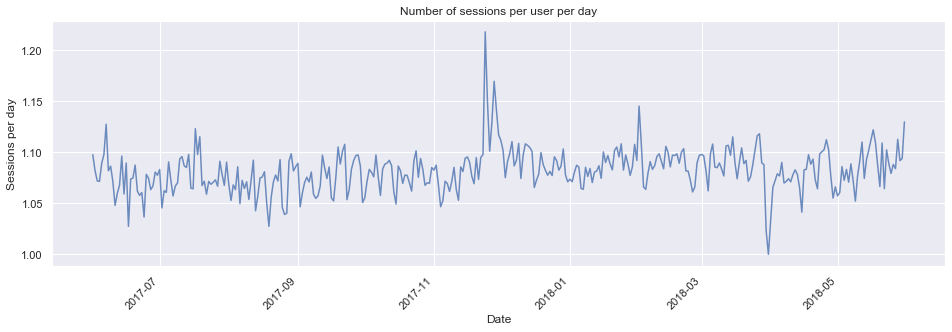

In [114]:
sessions_per_user.plot(figsize=(16, 5), 
                   title='Number of sessions per user per day', 
                   grid=True, legend=False, y='sessions_per_user',  alpha=0.8)
plt.xticks(rotation= 45)
plt.xlabel('Date')
plt.ylabel('Sessions per day')
plt.show()

We calculated the average number of sessions per user per day to be 1.08, that is, each user that visited our platform spend at least 1 session per day on avreage. 

##### What is the length of each session?

In [115]:
# calculate the duration of the session
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
display(visits['session_duration_sec'].describe())
display(visits.head())

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12,2017-12-21,2017-12-27,0


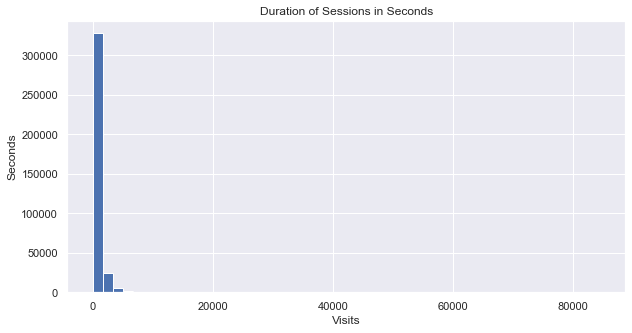

In [116]:
# plot a histogram for the length of sessions in seconds
visits['session_duration_sec'].hist(bins=50, figsize=(10, 5))
plt.title('Duration of Sessions in Seconds')
plt.xlabel('Visits')
plt.ylabel('Seconds')
plt.show()

In [117]:
# calculate the avreage session length
asl = visits['session_duration_sec'].mode()[0]
display('Average Session Length (ASL): {}'.format(asl))

'Average Session Length (ASL): 60'

In [118]:
# create a dataset by grouping the dataset 'visits' by 'date' and 'device'
device = visits.groupby(['date', 'device'])['session_duration_sec'].mean().reset_index()
display(device.head())

# create a line plot for the dataset
fig = px.line(device, x='date', y='session_duration_sec',
              color='device',
              title='Average Sessions Per Day For Device Types',
              labels={'date': 'Date', 
                      'session_duration_sec': 'Seconds'})
fig.show()

,date,device,session_duration_sec
0,2017-06-01,desktop,724.267465
1,2017-06-01,touch,488.214724
2,2017-06-02,desktop,626.335341
3,2017-06-02,touch,599.625000
4,2017-06-03,desktop,681.577508


**Conclusion**

We decided to calculate the length of each session by finding the Average Session Length (ASL), which is the amount of time users spend on our platform in the average session. This can be done by finding the mean of the difference between column `end_ts` and column `start_ts`. But after taking a look at the distrbution, we decided to take the mode of the difference because it is impossible for us to take the mean since the distribution is not normal.

We calculated the ASL to be 60 seconds (1 minute) which prompted us to ask ourself the question: Is ! minute enough to buy a ticket for an event on our platform?

We also decided to take a look at the graphical representation of the daily average session for the two types of device (`desktop` and `touch`) used in visiting our platform. We dicovered that users that do visit our platform with `desktop` spent more time on the platform than users that do visit with `touch`. To our surprise, the line plot for the average session per day for users on `desktop` is very similar to that of the daily active users. This might implies that users on `desktop` have significant effect on the number of active users on our platform. 


[<a href="#Table-of-contents">Back to top</a>]

##### How often do users come back?

In [119]:
# create a dataset for each users' first visit date
first_visit_date = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit_date.columns = ['uid', 'first_visit']
display(first_visit_date.head())

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [120]:
# join 'first_visit_date' dataset with the initial dataset 'visits'
visits = visits.merge(first_visit_date.set_index('uid'), on='uid', how='left')

# convert column 'first_visit' and 'date' to datetime data type
visits['first_visit'] = visits['first_visit'].astype('datetime64[M]')
visits['date'] = visits['date'].astype('datetime64[M]')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-14,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-15,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-17,2018-05-01,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12,2017-12-21,2017-12-01,0,2017-12-01


In [121]:
# Calculate the return month for each user from their first visit
visits['cohort_lifetime'] = ((pd.to_datetime(visits['date']) - pd.to_datetime(visits['first_visit']))\
                            / np.timedelta64(1, 'M')).round().astype('int')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_visit,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-14,2017-12-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-15,2018-02-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-17,2018-05-01,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12,2017-12-21,2017-12-01,0,2017-12-01,0


In [122]:
# group 'visits' by 'first_visit' and 'cohort_lifetime' columnn
cohorts = visits.groupby(['first_visit', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
display(cohorts.head())

,first_visit,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [123]:
# find the initial number of users in the cohort by looking at the 0th month
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_uid'})
display(initial_users_count)

,first_visit,cohort_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [124]:
# merge cohorts and initial_users_count
cohorts = cohorts.merge(initial_users_count, on='first_visit')

# calculate the retention rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_uid']
cohorts['first_visit'] = cohorts['first_visit'].dt.strftime('%Y-%m')
display(cohorts.head())

,first_visit,cohort_lifetime,uid,cohort_uid,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


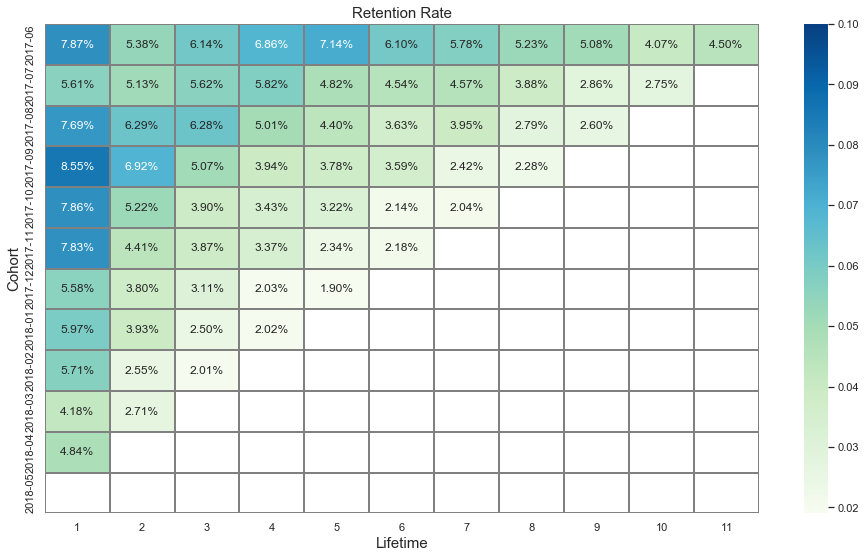

In [125]:
# create a pivot table
retention_pivot = cohorts.pivot_table(index='first_visit', columns='cohort_lifetime', values='retention', aggfunc='sum')

# create a heatmap of the pivot table
del retention_pivot[0] 
sns.set(style='white')
plt.figure(figsize=(16, 9))
sns.heatmap(
    retention_pivot, annot=True, fmt='.2%', vmax=.1,
    linewidths=1, linecolor='gray', cmap='GnBu')
plt.title('Retention Rate', size=15)
plt.ylabel('Cohort', size=15)
plt.xlabel('Lifetime', size=15)
plt.show()

**Conclusion**

To find out how often users come back to our platform, we need to calculate the retention rate. We first take the date the users were first active and store the data in `first_visit_date` Series object and join it with the initial DataFrame `visits`. We then find the cohort's lifetime by adding a column `cohort_lifetime` that stores the differences between the date of the users' first visits (`first_visit`) and the column `date`, and divide the results by the constant value `np.timedelta64(1, 'M')`. We then formed cohorts by month by grouping by column `first_visit` and `cohort_lifetime` and finding the number of active users for each cohort. We then retrieved the initial number of users in a cohort and divide it by the number of users for each subsequent month.

Then we compiled a pivot table `retention_pivot` and made a heatmap to visualize the table so that the trends and patterns will become more obvious. From the heatmap, we saw decrease in the first-month retention rate from 7.87% to 7.69% between June 2017 and August 2017, which will increase to 8.55% in September 2017. After that, the first-month retention rate is decreasing for the remaining new cohort to 4.84%. So in eight months, the retention rate fell by 3.71 percentage points from September 2017 to April 2018. This means that ver small percentage of the users used to return to our platform even though each month have a relatively big amount of new visitors. We can also notice that in the cohorts of winter months of 2017, the retention rate seems to be higher, which corresponds with the general pattern of buying more in the winter and participating in more closed events.

[<a href="#Table-of-contents">Back to top</a>]

In [126]:
# average retention rate for the second month of cohort life
avg_retention_month2 = retention_pivot[1].mean()
display('{:.2%}'.format(avg_retention_month2))

'6.52%'

We calculated the average retention rate for the second month of the cohort life to be 6.52%

#### Sales

##### When do people start buying?

In [127]:
# convert column 'order_month' to datetime datatype
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# create a dataset for each users' first order date
first_order_date = orders.groupby(['uid'])['order_month'].min().reset_index()
first_order_date.columns = ['uid', 'first_order']
display(first_order_date.head()) 

,uid,first_order
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [128]:
# join 'first_visit_date' and 'first_order_date' datasets
first_visit_order = visits.join(first_order_date.set_index('uid'), on='uid')

# delete columns that are not needed
first_visit_order.drop(first_visit_order.columns[[1, 3, 5, 6, 7, 8, 9]], axis=1, inplace=True)

# change column 'first_order' and 'first_visit' to datetime datatype
first_visit_order['first_visit'] = first_visit_order['first_visit'].astype('datetime64[m]')
first_visit_order['first_order'] = first_visit_order['first_order'].astype('datetime64[m]')

# delete rows with missing values in column 'first_order'
first_visit_order = first_visit_order[first_visit_order['first_order'].notna()]

# find the time elapse from the first visit to the first order
first_visit_order['conversion_day'] = ((first_visit_order['first_order'] - first_visit_order['first_visit'])\
                                     / np.timedelta64(1, 'D')).round().astype('int')

display(first_visit_order.head(10))

,device,source_id,uid,first_visit,cohort_lifetime,first_order,conversion_day
3,desktop,9,16174680259334210214,2018-03-01,2,2018-03-01,0
5,desktop,5,16007536194108375387,2017-09-01,0,2017-09-01,0
12,desktop,4,8056418121947262981,2017-06-01,8,2017-06-01,0
15,touch,2,18188358787673499603,2018-02-01,0,2018-02-01,0
25,desktop,4,2307401184189569202,2017-09-01,3,2017-09-01,0
27,desktop,3,4499746016005494365,2017-10-01,0,2017-11-01,31
37,desktop,3,15857957287537270437,2017-09-01,6,2018-03-01,181
38,touch,4,15763368622958393183,2017-11-01,4,2018-03-01,120
43,touch,5,15868686231870595097,2018-03-01,0,2018-03-01,0
44,desktop,9,9419370217043167984,2017-09-01,3,2017-10-01,30


,conversion_day,uid
0,0,30087
3,31,1140
2,30,957
5,61,691
10,92,496
16,153,283
13,122,243
15,151,230
6,62,214
1,28,202


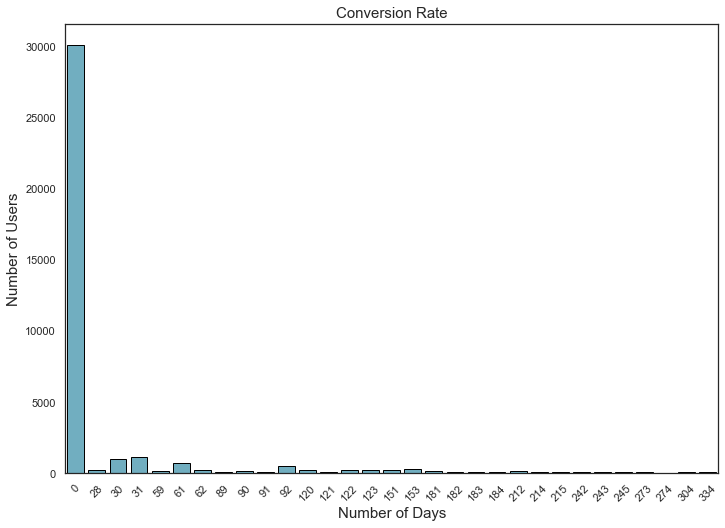

In [129]:
# group 'data by 'conversion_day' columnn
conversion = first_visit_order.groupby('conversion_day').agg({'uid': 'nunique'}).reset_index()
conversion = conversion.sort_values(by='uid', ascending=False)
display(conversion.head(10))

# visualize column 'conversion_day' with barplot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = conversion, x ="conversion_day", y = 'uid', edgecolor = 'black', color = 'c')
plt.title('Conversion Rate', size=15)
plt.ylabel('Number of Users', size=15)
plt.xlabel('Number of Days', size=15)
plt.xticks(rotation= 45)
plt.show()

**Conclusion**

We discovered that most users ordered on the first day of visit to our platform, and also that there are users who made their first order after more than 150 days. This might implies that most users who made orders already know what they want to order for. This might be the reason why we have our daily ASL (Average Session Length) to be 60 seconds as majority of the users do not spend much time looking for information about what they want.

[<a href="#Table-of-contents">Back to top</a>]

##### How many orders do they make during a given period of time?

In [130]:
# extract year & month, and week from column 'buy_ts'
orders['month'] = orders['buy_ts'].apply(lambda x: x.strftime('%Y-%m'))
orders['week'] = orders['buy_ts'].astype('datetime64[W]')
display(orders.head())

,buy_ts,revenue,uid,order_month,month,week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-06-01


In [131]:
# group data by column 'week'
orders_weekly = orders.groupby(['week'])['uid'].count().reset_index()
orders_weekly = orders_weekly.rename(columns={'uid': 'num_of_order'})
display(orders_weekly.head())

# create a line plot for weekly orders
fig = px.line(orders_weekly, x='week', y='num_of_order',
             title='Number of Orders Per Week', 
              labels={'week': 'Week', 
                      'num_of_order': 'Number of Orders'})
fig.show()

,week,num_of_order
0,2017-06-01,896
1,2017-06-08,525
2,2017-06-15,341
3,2017-06-22,441
4,2017-06-29,461


**Conclusion**

We noticed a major increase in the number of orders between the first week of August and first week of October 2017, but the highest peak happened during the forth week of November 2017. We predicted this peak to be as result of users ordering ahead of the festive period, which is December 2017. Let's have a look at the same picture in months.

[<a href="#Table-of-contents">Back to top</a>]

In [132]:
# group data by column 'month'
orders_monthly = orders.groupby(['month'])['uid'].count().reset_index()
orders_monthly = orders_monthly.rename(columns={'uid': 'num_of_order'})
display(orders_monthly)

# create a line plot for monthly orders
fig = px.line(orders_monthly, x='month', y='num_of_order',
             title='Number of Orders Per Month', 
              labels={'month': 'Month', 
                      'num_of_order': 'Number of Orders'})
fig.show()

,month,num_of_order
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


**Conclusion**

We discovered that the highest peak of the orders happens in December 2017, which is the month of Christmas and new years eve. There was decline in sales after December 2017. This might be connected to the specifics of the celebrations and winter season, but we supposed that it can be explained better by the particulars of the citizen's lifestyle. During winter months, most people might prefer spending indoor in their residence city, so more events might interest the clients, while in the summertime, they might mostly spend their time on vacations out of the town which will lead to a decline in orders.

[<a href="#Table-of-contents">Back to top</a>]

,uid,num_orders
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


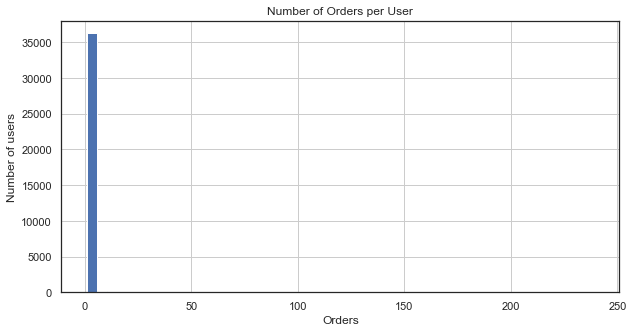

'Average number of orders per user: 1.3803734735228081'

In [133]:
# retrieve the month of each customer's first purchase
orders_per_user = orders.groupby('uid').agg({'revenue': 'count'}).reset_index()
orders_per_user.columns = ['uid', 'num_orders']
display(orders_per_user.head())

# plot a histogram for the number of orders
orders_per_user['num_orders'].hist(bins=50, figsize=(10, 5))
plt.title('Number of Orders per User')
plt.xlabel('Orders')
plt.ylabel('Number of users')
plt.show()

# calculate the avreage session length
anou = orders_per_user['num_orders'].mean()
display('Average number of orders per user: {}'.format(anou))

We calculated the average number of orders per user to be 1, that is, each user that visited our platform make at least 1 order on avreage between June 2017 to May 2018.

##### What is the average purchase size?

In [134]:
display(f"The average purchase size in a week is {round(orders_weekly['num_of_order'].mean(), 0)}")

display(f"The average purchase size in a month is {round(orders_monthly['num_of_order'].mean(), 0)}")

'The average purchase size in a week is 951.0'

'The average purchase size in a month is 4201.0'

**Conclusion**

We calculated that the average number of users that do place order is 951 per week, while the average number of users that do place order is 4201 per month.

[<a href="#Table-of-contents">Back to top</a>]

In [135]:
avg_purchase_size = orders['revenue'].mean()
display("The average purchase is: {:.2f} US dollar".format(avg_purchase_size))

'The average purchase is: 5.00 US dollar'

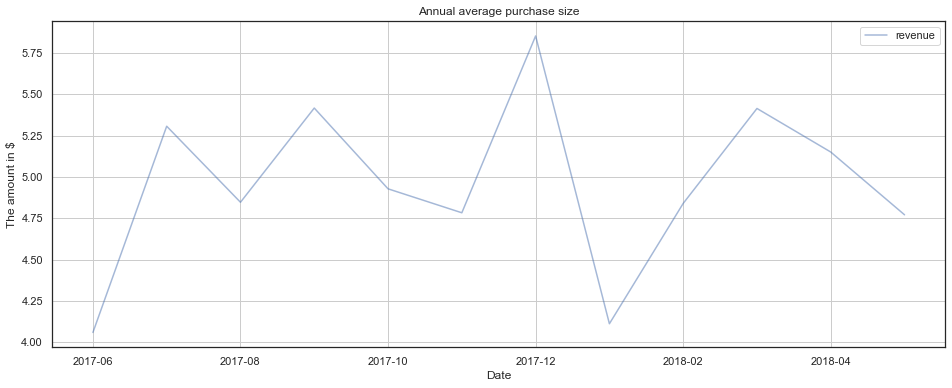

In [136]:
# create a line plot for annual average purchase size
vagp = orders.pivot_table(index='month', values='revenue', aggfunc='mean')

vagp.plot(figsize=(16, 6), 
          title='Annual average purchase size',
          grid=True, legend=True, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('The amount in $')
plt.show()

##### How much money do they bring? (LTV)

To calculate LTV, we will build a cohort report from the date of the first purchase. Let's find the number of buyers in each cohort. Next, we will add the month of the first purchase to the purchase information. We calculate the age of each cohort. After that, we add the number of buyers in each cohort to the cohort report and calculate the revenue for each buyer. We build an incremental cohort report showing the cumulative revenue per buyer and visualize it using a heat map.

In [137]:
# retrieve the month of each customer's first purchase
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [138]:
# calculate the number of customers (num_buyers) for each month 
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'num_buyers']
display(cohort_sizes.head())

# create a bar chart for cohort_sizes
fig = px.bar(cohort_sizes, x='first_order_month', y='num_buyers',
             title='Number of Buyers Per Month', 
              labels={'first_order_month': 'Cohorts', 
                      'num_buyers': 'Number of Users'})
fig.show()

,first_order_month,num_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [139]:
# merge 'orders' and 'first_orders'
orders_ = pd.merge(orders, first_orders, on='uid')
display(orders_.head()) 

,buy_ts,revenue,uid,order_month,month,week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,2017-06-01,2017-06-01


In [140]:
# group the table of orders by month of first purchase and month of purchase and sum up the revenue
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts.head())

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [141]:
# group the cohorts table by month of first purchase and sum up the revenue
revenue_total = cohorts.groupby('first_order_month').agg({'revenue': 'sum'}).reset_index()
display(revenue_total)

# create a bar chart for revenue_total
fig = px.bar(revenue_total, x='first_order_month', y='revenue',
             title='Total Revenue Per Cohorts', 
              labels={'first_order_month': 'Cohorts', 
                      'revenue': 'Revenue'})
fig.show()

,first_order_month,revenue
0,2017-06-01,24031.69
1,2017-07-01,16127.92
2,2017-08-01,11606.26
3,2017-09-01,34676.32
4,2017-10-01,27603.45
5,2017-11-01,26098.99
6,2017-12-01,33485.74
7,2018-01-01,16663.13
8,2018-02-01,16750.50
9,2018-03-01,19273.41


In [142]:
# merge data on how many users made their first purchases in each month to the cohorts table
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
display(report.head())

,first_order_month,num_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [143]:
# calculate the cohort's age
report['age'] = (
    (report['order_month'] - report['first_order_month']) 
    / np.timedelta64(1, 'M')).round().astype('int')

display(report.head())

,first_order_month,num_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [144]:
# calculate LTV
report['ltv'] = report['revenue'] / report['num_buyers']

# visualize the cohorts as a pivot table to make things clear
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

display(output.cumsum(axis=1))

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


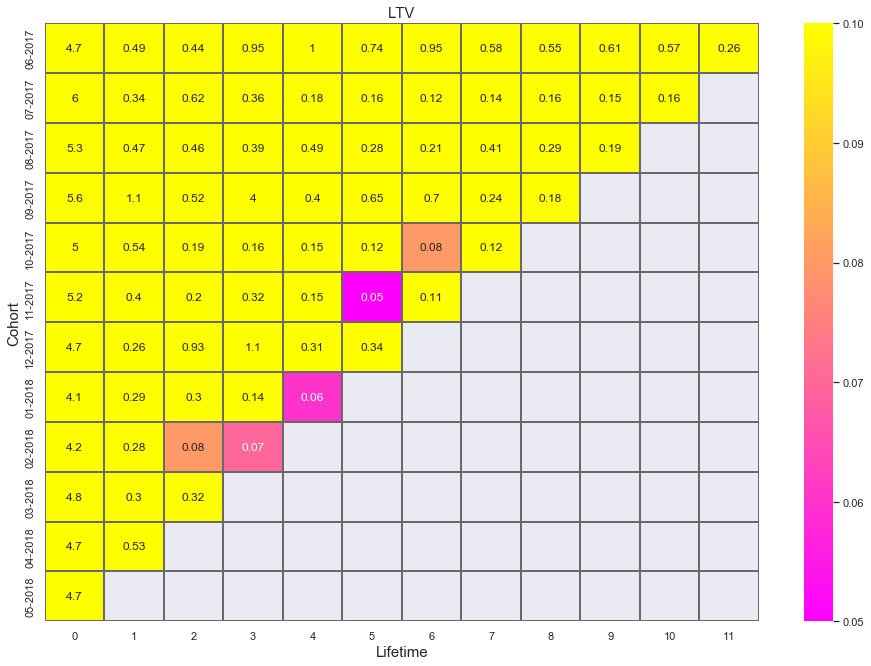

In [145]:
# create a heatmap of the pivot table
output.index = output.index.strftime("%m-%Y")
sns.set(style='darkgrid')
plt.figure(figsize=(16, 11))
sns.heatmap(output, annot=True,
            vmax = .1, linewidths=1, 
            linecolor='dimgray', cmap = 'spring')
plt.title('LTV', size=15)
plt.ylabel('Cohort', size=15)
plt.xlabel('Lifetime', size=15)
plt.show()

In [146]:
# calculate the sum of ltv for each month
ltv_total = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index().round(2)
display(ltv_total)

# create a bar chart for ltv_total
fig = px.bar(ltv_total, x='first_order_month', y='ltv',
             title='Total LTV Per Month', 
              labels={'first_order_month': 'Cohorts', 
                      'ltv': 'LTV'})
fig.show()

display(round(ltv_total['ltv'].mean(), 2))

,first_order_month,ltv
0,2017-06-01,11.88
1,2017-07-01,8.39
2,2017-08-01,8.47
3,2017-09-01,13.44
4,2017-10-01,6.36
5,2017-11-01,6.40
6,2017-12-01,7.64
7,2018-01-01,4.94
8,2018-02-01,4.59
9,2018-03-01,5.46


7.28

**Conclusion**

To know how much money each customer bring to our company, we decided to calculate the customer's lifetime value (LTV). First, we retrieved the month of each customer's first purchase and calculated the number of customers for each month. We discovered that October, November and December 2017 considerably have the highest number of customer with over 4,000 customers in each month, and August 2017 having the lowest number of customers of 1370. The we went ahead to sum the revenue for each cohort.  
To our surprise, September 2017 cohort have the highest revenue with over 34,000 worth of revenue and December 2017 cohort are the second in line with over 33,000 worth of revenue. August 2017 cohort have the lowest revenue with over 11,000 worth of revenue. Unfortunately, we don't know the margin rate to calculate the gross profit. So, we decided to calculate the LTV by dividing the cohort's revenue for each month by the total number of users in each cohort and visualize the cohorts as a pivot table to make things clear.  
On average, the revenue brought in by each customers is 6.99. The LTV varies from month to month but each customers from September 2017 cohort have the highest LTV by bringing in 13.44 in revenue over their eight-month lifetime, and each customers from February 2018 cohort have the lowest LTV by bringing in 4.59 in revenue over their four-month lifetime.

[<a href="#Table-of-contents">Back to top</a>]

#### Marketing

##### How much money was spent? 
**Overall**

In [147]:
# calculate overall money spent
total_costs = costs['costs'].sum() 
display(f"The overall money spent on marketing is: {total_costs}")

'The overall money spent on marketing is: 329131.62'

**Per source**

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


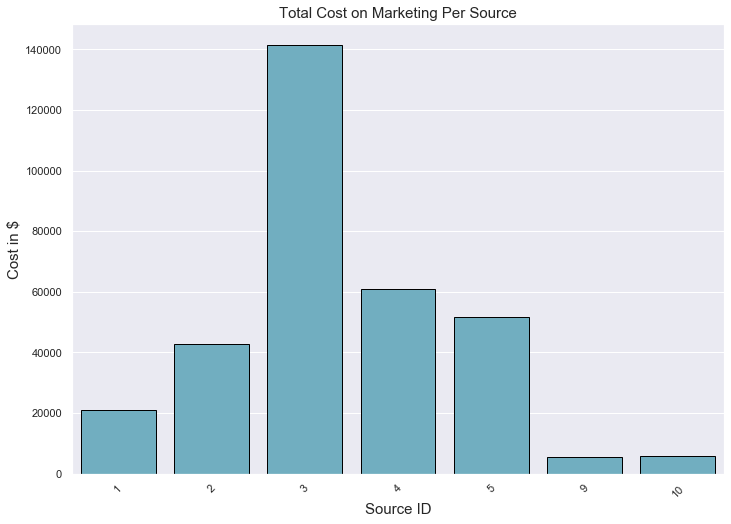

In [148]:
# create a dataframe to store money spent per source
costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
display(costs_per_source)

# visualize the costs_per_source dataframe
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = costs_per_source, x ="source_id", y = 'costs', edgecolor = 'black', color = 'c')
plt.title('Total Cost on Marketing Per Source', size=15)
plt.ylabel('Cost in $', size=15)
plt.xlabel('Source ID', size=15)
plt.xticks(rotation= 45)
plt.show()

**Conclusion**

The overall money spent on marketing is 329131.62 US dollar. So, we decided to further our investigation by knowing how much each source spent on marketing. Most of the money, which is slightly less than half of the total budget for marketing was spent on the source 3, which is the second biggest source by the number of users it brings. The least money were spent on source 9 and 10. We shall continue to observe the sources with the customer acquisition cost (CAC) values.

[<a href="#Table-of-contents">Back to top</a>]

**Over time (monthly)**

In [149]:
# extract year and month from the column 'dt'
costs['month'] = costs['dt'].apply(lambda x: x.strftime('%Y-%m'))

# create a dataframe to store money spent per month
costs_per_month = costs.groupby('month')['costs'].sum().reset_index()
display(costs_per_month)

# visualize the costs_per_source dataframe
fig = px.bar(costs_per_month, x='month', y='costs',
             title='Money Spent on Marketing Per Month', 
              labels={'costs': 'Cost in $', 
                      'month': 'Months'})
fig.show()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


**Conclusion**

The largest amount was spent on advertising between October 2017 to December 2017, which are coincedentally the months with the highest number of customers. The general picture fits to the previous graphs for the number of buyers per month, peak activity at the winter months and decline at the summer.

[<a href="#Table-of-contents">Back to top</a>]

##### How much did customer acquisition from each of the sources cost?

,source_id,uid,costs,cac
0,1,18999,20833.27,1.096546
1,2,26245,42806.04,1.631017
2,3,74756,141321.63,1.890439
3,4,83525,61073.60,0.731201
4,5,56974,51757.10,0.908434
5,9,9264,5517.49,0.595584
6,10,8067,5822.49,0.721766


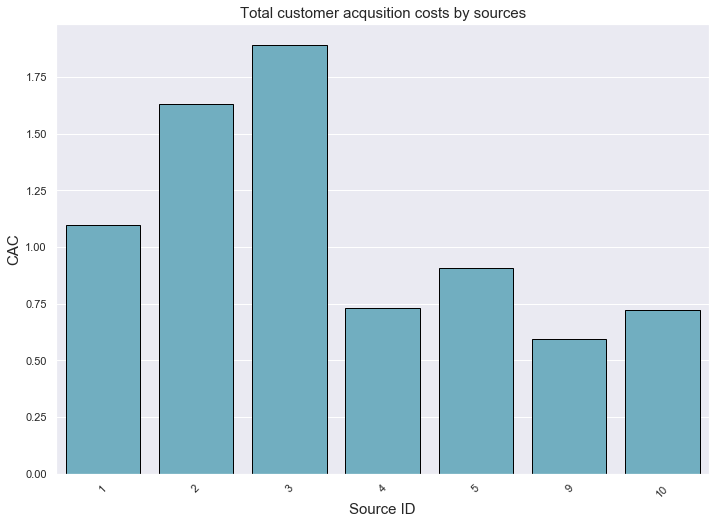

In [150]:
# merge 'visits_source' and 'costs_per_source'
source_cac = pd.merge(visits_source, costs_per_source, on = 'source_id')

# calculate CAC
source_cac['cac'] = source_cac['costs'] / source_cac['uid']
display(source_cac)

# create a bar plot for the data
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data =source_cac, x ="source_id", y='cac', edgecolor='black', color='c')
plt.title('Total customer acqusition costs by sources', size=15)
plt.ylabel('CAC', size=15)
plt.xlabel('Source ID', size=15)
plt.xticks(rotation= 45)
plt.show()

**Conclusion**

To calculate how much the customer acquisition from each of the sources cost, we divide the costs for each source by the number of users for each source. The source id 3 costs the company at least twice as any other source while providing not so many users. Acquiring each customer from this source cost the company an average of 1.89.  
We should explore if there a potential to providing more users from sources 9 and 10, which provide us with a relatively small representation of users while having the smallest CAC.

[<a href="#Table-of-contents">Back to top</a>]

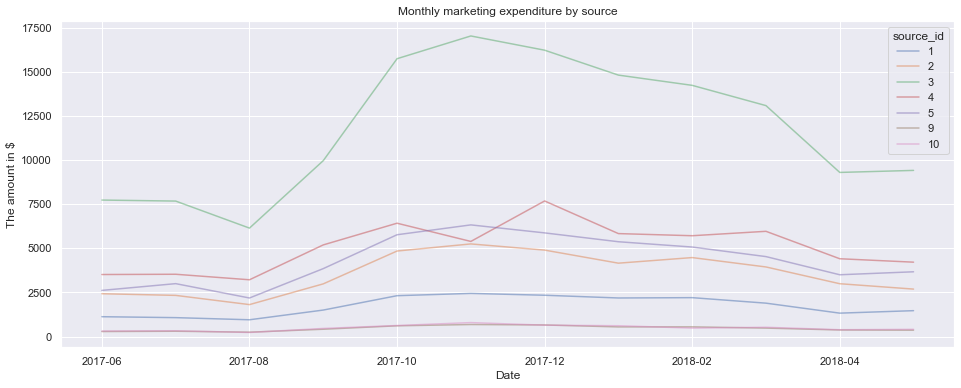

In [151]:
# create a line plot for expenses of individual sources
costs_month_by_source = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

costs_month_by_source.plot(figsize=(16, 6), 
                           title='Monthly marketing expenditure by source',  
                           grid=True, legend=True, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('The amount in $')
plt.show()

**Conclusion**

From the above graph, we can see that source id 3 always get the highest money allocated to marketing every month. This satisfies what we observed earlier that most of the money allocated to marketing are spent on source id 3. Similarly, source id 9 and 10 always get the least of money allocated to marketing every month. We also noticed a drop in the money spent on source 4 in November 2017. 

[<a href="#Table-of-contents">Back to top</a>]

###### How much did customer acquisition from each of the cohort cost?

In [152]:
# extract year and month from the column 'dt'
report['first_order_month'] = report['first_order_month'].apply(lambda x: x.strftime('%Y-%m'))

# rename column 'first_order_month' to 'month'
report = report.rename(columns={'first_order_month': 'month'})
display(report.head())

,month,num_buyers,order_month,revenue,age,ltv
0,2017-06,2023,2017-06-01,9557.49,0,4.724414
1,2017-06,2023,2017-07-01,981.82,1,0.485329
2,2017-06,2023,2017-08-01,885.34,2,0.437637
3,2017-06,2023,2017-09-01,1931.30,3,0.954671
4,2017-06,2023,2017-10-01,2068.58,4,1.022531


In [153]:
# merge 'visits_source' and 'costs_per_source'
month_cac = pd.merge(report, costs_per_month, on = 'month')

# calculate CAC
month_cac['cac'] = month_cac['costs'] / month_cac['num_buyers']
display(month_cac.head())

,month,num_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


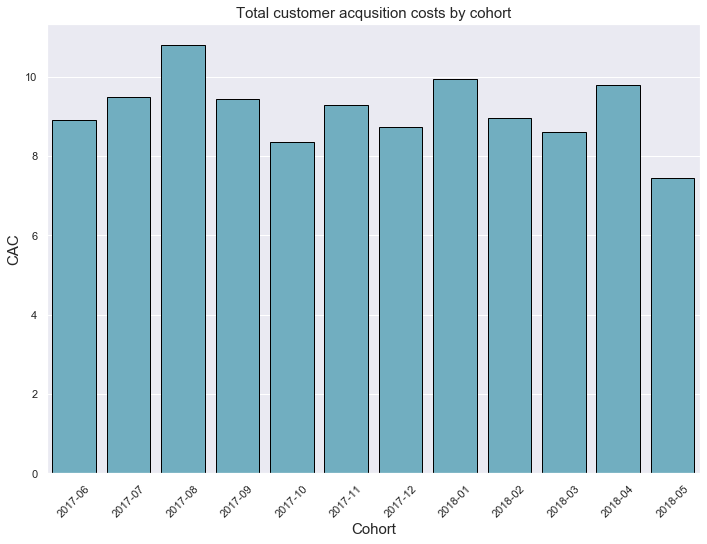

9.32

In [154]:
# create a bar plot for the data
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data =month_cac, x ="month", y='cac', edgecolor='black', color='c')
plt.title('Total customer acqusition costs by cohort', size=15)
plt.ylabel('CAC', size=15)
plt.xlabel('Cohort', size=15)
plt.xticks(rotation= 45)
plt.show()

display(round(month_cac.cac.mean(), 2))

**Conclusion**

We decided to calculate the CAC for each cohort by dividing the costs for the cohort month by the number of users in each cohort. The average customer acquisition value by month is 9.32.

[<a href="#Table-of-contents">Back to top</a>]

##### How worthwhile where the investments? (ROI)

In [155]:
# calculate the return on investment for each cohort
month_cac['roi'] = month_cac['ltv'] / month_cac['cac']
display(month_cac.head())

,month,num_buyers,order_month,revenue,age,ltv,costs,cac,roi
0,2017-06,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091,0.530530
1,2017-06,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091,0.054500
2,2017-06,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091,0.049145
3,2017-06,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091,0.107205
4,2017-06,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091,0.114825


In [156]:
# create a pivot table for month_cac
output_1 = month_cac.pivot_table(
    index='month', columns='age',
    values='roi', aggfunc='mean'
)

output_1 = output_1.cumsum(axis=1).round(2)
display(output_1)

# average the values in each column
display(output_1.mean(axis=0))

age,0,1,2,3,4,5,6,7,8,9,10,11
month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

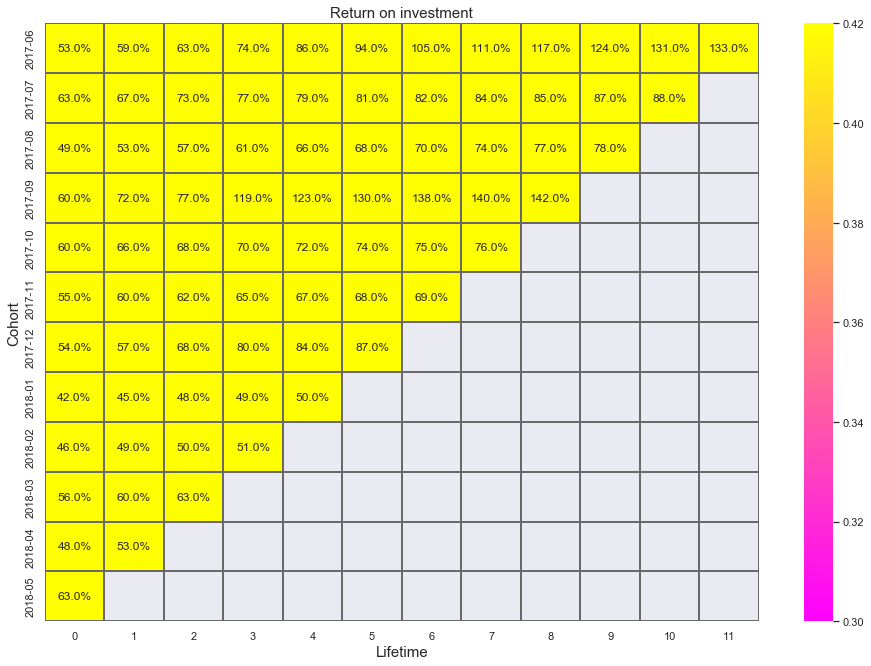

In [157]:
# create a heatmap of the pivot table
sns.set(style='darkgrid')
plt.figure(figsize=(16, 11))
sns.heatmap(output_1, annot=True, fmt='.01%', vmax = .3, linewidths=1, linecolor='dimgray', cmap = 'spring')
plt.title('Return on investment', size=15)
plt.ylabel('Cohort', size=15)
plt.xlabel('Lifetime', size=15)
plt.show()

**Conclusion**

We decided to calculate the return on marketing investment (ROI) to know if our investment is efficient or profitable. We do this by dividing LTV for each cohort by CAC for each cohort. We discovered that there are only two cohorts during the given period when the investment fully returned to our company, the June 2017 cohort paid off in the 7th month (ROI = 1.05), and the September 2017 cohort paid off in the 4th month (ROI = 1.19). In every other case, investments didn't return.  
In general, towards the end of the 9th or 11th month, every cohort had either paid off or gotten close, thst is, the global tendency is that the investment doesn't return.

[<a href="#Table-of-contents">Back to top</a>]